# **Air Pollution and Respiratory Disease Analytics — Lagos case study**

# Project Overview
This project analyzes the relationship between air pollution and respiratory diseases in Lagos, Nigeria — Africa's most populous city with **>20 million** people.

## Objectives
1. Derive a **pollution index** (composite feature of all pollutants)  
2. Monitor air pollution trends over time  
3. Analyze relationship between pollution spikes and hospital respiratory cases  
4. Predict respiratory disease surges using pollution data  
5. Identify high-risk cities, periods, and pollutants  
6. Recommend public health and urban environmental policies  

## Hypotheses to Test
- **H1:** Higher **PM2.5** levels correlate with more respiratory hospital cases  
- **H2:** Cities with higher **industrial indices** have worse air quality  
- **H3:** **Harmattan** season shows spikes in **PM10** and respiratory cases  
- **H4:** Weather conditions (low humidity, high temperatures) worsen pollution impact


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

## **Data Loading and Initial Inspection**

In [2]:
# Load the datasets

df1 = pd.read_excel("lagos_air_pollution_health_data.xlsx")
df2 = pd.read_excel("lagos_air_pollution_health_data_1.xlsx")

In [3]:
# Check out the shape of our datasets

print(f"Dataset 1 shape: {df1.shape}")
print(f"Dataset 2 shape: {df2.shape}")

Dataset 1 shape: (258420, 17)
Dataset 2 shape: (258420, 16)


In [4]:
# Examine the feature names differences

print("\nDataset 1 columns:", df1.columns.tolist())
print("Dataset 2 columns:", df2.columns.tolist())


Dataset 1 columns: ['City', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'Unnamed: 6', 'o3', 'hospital_id', 'respiratory_cases', 'avg_age_of_patients', 'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm', 'population_density', 'industrial_activity_index']
Dataset 2 columns: ['C', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'o3', 'hospital_id', 'respiratory_cases', 'avg_age_of_patients', 'weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm', 'population_density', 'industrial_activity_index']


In [5]:
# Display first five observations of our first dataset

df1.head()

,City,date,pm2_5,pm10,no2,so2,Unnamed: 6,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
0,AJAH,2021-01-01,39.86,98.09,54.93,29.68,29.68,46.00,HOSP_AJA_10,14.0,48.0,27.7,60.0,1.0,9.3,13683.2,0.77
1,AJAH,2021-01-01,68.06,80.35,58.54,33.05,33.05,48.53,HOSP_AJA_6,16.0,44.9,25.9,52.4,3.2,5.0,15838.7,0.27
2,AJAH,2021-01-01,77.60,76.60,58.08,25.11,25.11,17.85,HOSP_AJA_10,9.0,22.7,27.9,51.9,3.2,8.4,17918.3,0.30
3,AJAH,2021-01-01,90.22,98.94,74.46,19.47,19.47,35.27,HOSP_AJA_7,12.0,41.4,28.9,73.6,3.8,0.3,28635.0,0.51
4,AJAH,2021-01-01,85.23,95.18,40.59,14.81,14.81,52.23,HOSP_AJA_3,17.0,37.0,32.4,70.4,2.2,10.0,24057.7,0.77


In [6]:
# Display first five observations of our second dataset

df2.head()

,C,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
0,I K E J A,2021-01-01,65.64,135.39,45.21,22.29,34.84,HOSP_IKE_1,16.0,44.0,25.1,40.0,3.1,2.2,22937.7,0.87
1,Ikeja,2021-01-01,76.49,116.65,50.01,10.20,32.19,HOSP_IKE_4,12.0,33.1,25.3,53.5,3.8,2.2,21787.8,0.32
2,I K E J A,2021-01-01,55.50,101.72,39.10,21.91,49.99,HOSP_IKE_1,20.0,33.5,27.7,72.3,4.7,1.0,14798.0,0.78
3,Ikeja,2021-01-01,56.37,138.53,46.40,28.13,24.89,HOSP_IKE_8,15.0,49.3,32.8,62.9,4.8,8.2,18013.6,0.24
4,I K E J A,2021-01-01,93.77,123.73,59.55,11.82,29.73,HOSP_IKE_3,20.0,45.4,27.9,64.8,3.4,9.1,25980.3,0.30


In [7]:
# Display basic dataset overview information of our first dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258420 entries, 0 to 258419
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   City                       258392 non-null  object        
 1   date                       258397 non-null  datetime64[ns]
 2   pm2_5                      258417 non-null  float64       
 3   pm10                       258411 non-null  float64       
 4   no2                        258419 non-null  float64       
 5   so2                        258412 non-null  float64       
 6   Unnamed: 6                 258412 non-null  float64       
 7   o3                         258413 non-null  float64       
 8   hospital_id                258418 non-null  object        
 9   respiratory_cases          258413 non-null  float64       
 10  avg_age_of_patients        258404 non-null  float64       
 11  weather_temperature        258416 non-null  float64 

In [8]:
# Display basic dataset overview information of our second dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258420 entries, 0 to 258419
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   C                          258392 non-null  object        
 1   date                       258397 non-null  datetime64[ns]
 2   pm2_5                      258417 non-null  float64       
 3   pm10                       258411 non-null  float64       
 4   no2                        258419 non-null  float64       
 5   so2                        258412 non-null  float64       
 6   o3                         258413 non-null  float64       
 7   hospital_id                258418 non-null  object        
 8   respiratory_cases          258413 non-null  float64       
 9   avg_age_of_patients        258404 non-null  float64       
 10  weather_temperature        258416 non-null  float64       
 11  weather_humidity           258414 non-null  float64 

In [9]:
# Checking for duplicates in the first dataset

df1.duplicated().sum()

0

In [10]:
# Checking for duplicates in the second dataset

df2.duplicated().sum()

0

In [11]:
# Checking for missing values in first dataset

df1.isna().sum()

City                         28
date                         23
pm2_5                         3
pm10                          9
no2                           1
so2                           8
Unnamed: 6                    8
o3                            7
hospital_id                   2
respiratory_cases             7
avg_age_of_patients          16
weather_temperature           4
weather_humidity              6
wind_speed                    4
rainfall_mm                   3
population_density           22
industrial_activity_index     5
dtype: int64

In [12]:
# Checking for missing values in second dataset

df2.isna().sum()

C                            28
date                         23
pm2_5                         3
pm10                          9
no2                           1
so2                           8
o3                            7
hospital_id                   2
respiratory_cases             7
avg_age_of_patients          16
weather_temperature           4
weather_humidity              6
wind_speed                    4
rainfall_mm                   3
population_density           22
industrial_activity_index     5
dtype: int64

## **Data Cleaning and PreProcessing**

In [13]:
def wrangle(first_dataset, second_dataset):
    """
    Clean our data
    """

    # Create a copy to avoid modifying original
    df1 = first_dataset.copy()
    df2 = second_dataset.copy()
    
    # Fix column naming issues by lowercasing all letters and removing any leading and trailing white spaces
    df1.columns = df1.columns.str.lower().str.strip()
    df2.columns = df2.columns.str.lower().str.strip()

    # Renaming inconsistent columns in both datasets
    df2.rename(columns={'c': 'city'}, inplace=True)

    # Remove 'unnamed: 6' column from df1 as it appears to be duplicate of so2
    df1.drop('unnamed: 6', axis=1, inplace=True)

    # Combine both datasets 
    df_combined = pd.concat([df1, df2], ignore_index=True)

    # Clean city names (converts all city names to uppercase, removes leading or trailing whitespaces
    # Replaces multiple consecutive whitespaces in city names with single space
    df_combined['city'] = df_combined['city'].str.upper().str.strip()
    df_combined['city'] = df_combined['city'].str.replace(r'\s+', '', regex=True)

    # Hospital id: ensure all values are string and there are no leading or trailing whitespaces
    df_combined['hospital_id'] = df_combined['hospital_id'].astype(str).str.strip()


    # Handling Missing Values

    # For numerical columns, use median imputation because the median is far more robust to outliers and skewed distributions, 
    # which pollution data almost always has (rare extreme spikes)
    # We'll try to fill the median per city if possible
    numerical_cols = ['pm2_5', 'pm10', 'no2', 'so2', 'o3', 'respiratory_cases',
                     'avg_age_of_patients', 'weather_temperature', 'weather_humidity',
                     'wind_speed', 'rainfall_mm', 'population_density', 'industrial_activity_index']
    
    for col in numerical_cols:
        if df_combined[col].isnull().sum() > 0:
            # attempt per-city median
            try:
                df_combined[col] = df_combined.groupby('city')[col].apply(lambda x: x.fillna(x.median()))
            except Exception:
                df_combined[col] = df_combined[col].fillna(df_combined[col].median())

    # Handling Missing Values For categorical columns
    df_combined['city'] = df_combined['city'].fillna('UNKNOWN')
    df_combined['hospital_id'] = df_combined['hospital_id'].fillna('UNKNOWN')

    # Handling Missing Values in our date column
    # Convert date column to datetime format and handle invalid or malformed dates
    # Drop rows with missing dates
    df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')
    df_combined.dropna(subset=['date'], inplace=True)

    # Remove duplicates
    # df_combined.drop_duplicates(inplace=True)


    return df_combined

In [14]:
# Apply data cleaning to our datasets

df = wrangle(df1, df2)
df.head()

,city,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
0,AJAH,2021-01-01,39.86,98.09,54.93,29.68,46.00,HOSP_AJA_10,14.0,48.0,27.7,60.0,1.0,9.3,13683.2,0.77
1,AJAH,2021-01-01,68.06,80.35,58.54,33.05,48.53,HOSP_AJA_6,16.0,44.9,25.9,52.4,3.2,5.0,15838.7,0.27
2,AJAH,2021-01-01,77.60,76.60,58.08,25.11,17.85,HOSP_AJA_10,9.0,22.7,27.9,51.9,3.2,8.4,17918.3,0.30
3,AJAH,2021-01-01,90.22,98.94,74.46,19.47,35.27,HOSP_AJA_7,12.0,41.4,28.9,73.6,3.8,0.3,28635.0,0.51
4,AJAH,2021-01-01,85.23,95.18,40.59,14.81,52.23,HOSP_AJA_3,17.0,37.0,32.4,70.4,2.2,10.0,24057.7,0.77


In [15]:
# Display basic dataset overview of our cleaned dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516794 entries, 0 to 516839
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   city                       516794 non-null  object        
 1   date                       516794 non-null  datetime64[ns]
 2   pm2_5                      516794 non-null  float64       
 3   pm10                       516794 non-null  float64       
 4   no2                        516794 non-null  float64       
 5   so2                        516794 non-null  float64       
 6   o3                         516794 non-null  float64       
 7   hospital_id                516794 non-null  object        
 8   respiratory_cases          516794 non-null  float64       
 9   avg_age_of_patients        516794 non-null  float64       
 10  weather_temperature        516794 non-null  float64       
 11  weather_humidity           516794 non-null  float64      

In [16]:
# Statistical summary

df.describe()

,date,pm2_5,pm10,no2,so2,o3,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index
count,516794,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000,516794.000000
mean,2022-07-02 00:07:20.029876224,61.401514,92.185579,40.980025,15.354436,30.725710,12.861214,35.030675,30.000481,59.969034,3.000827,4.994569,20002.496234,0.550360
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,25.000000,40.000000,1.000000,0.000000,10000.100000,0.200000
25%,2021-10-01 00:00:00,49.950000,76.560000,33.340000,11.670000,24.670000,10.000000,27.500000,27.500000,50.000000,2.000000,2.500000,15006.000000,0.380000
50%,2022-07-02 00:00:00,60.690000,91.100000,40.510000,15.180000,30.380000,13.000000,35.000000,30.000000,59.900000,3.000000,5.000000,20001.150000,0.550000
75%,2023-04-02 00:00:00,72.080000,106.640000,48.090000,18.850000,36.400000,15.000000,42.600000,32.500000,70.000000,4.000000,7.500000,25008.500000,0.730000
max,2023-12-31 00:00:00,149.320000,207.330000,100.250000,43.940000,79.640000,34.000000,50.000000,35.000000,80.000000,5.000000,10.000000,29999.900000,0.900000
std,NaN,16.746178,22.844572,11.174443,5.394635,8.844392,3.806954,8.667640,2.890277,11.550695,1.153678,2.891316,5772.780148,0.202148


In [17]:
# Basic information about our dataset

print(f"\nUnique cities: {df['city'].unique()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total hospitals: {df['hospital_id'].nunique()}")
print(f"Cleaned dataset shape: {df.shape}")


Unique cities: ['AJAH' 'IKEJA' 'LEKKI' 'SURULERE' 'YABA' 'UNKNOWN']
Date range: 2021-01-01 00:00:00 to 2023-12-31 00:00:00
Total hospitals: 51
Cleaned dataset shape: (516794, 16)


### Duplicate Analysis

#### Dealing with the data collection/quality issue where multiple rows have the same city, same date, same hospital but different values 
#### for avg_age_of_patients, population_density, and even pollution readings.


In [18]:
# Check combinations that should be unique but aren't

city_date_hosp_counts = df.groupby(['city', 'date', 'hospital_id']).size().reset_index(name='count')
duplicated_city_dates_hosp = city_date_hosp_counts[city_date_hosp_counts['count'] > 1]

print(f"City-Date-Hospital combinations: {len(city_date_hosp_counts)}")
print(f"Duplicated City-Date-Hospital combinations: {len(duplicated_city_dates_hosp)}")
print(f"Percentage of duplicated combinations: {len(duplicated_city_dates_hosp)/len(city_date_hosp_counts)*100:.1f}%")

City-Date-Hospital combinations: 61985
Duplicated City-Date-Hospital combinations: 57639
Percentage of duplicated combinations: 93.0%


In [19]:
# View sample of problematic combinations

sample_duplicates = duplicated_city_dates_hosp.head()
sample_duplicates

,city,date,hospital_id,count
0,AJAH,2021-01-01,HOSP_AJA_1,2
1,AJAH,2021-01-01,HOSP_AJA_10,8
2,AJAH,2021-01-01,HOSP_AJA_2,6
3,AJAH,2021-01-01,HOSP_AJA_3,6
4,AJAH,2021-01-01,HOSP_AJA_4,6


In [ ]:
# Extract duplicated city-date-hospital combinations
duplicated_pairs = list(zip(duplicated_city_dates_hosp['city'], duplicated_city_dates_hosp['date'], duplicated_city_dates_hosp['hospital_id']))

# Filter full original data for these duplicated pairs
duplicated_records = df[df.apply(lambda row: (row['city'], row['date'], row['hospital_id']) in duplicated_pairs, axis=1)]

# Sort by city, date, hospital_id to cluster duplicates together
duplicated_records_sorted = duplicated_records.sort_values(['city', 'date', 'hospital_id'])

duplicated_records_sorted.head()

## **Feature Engineering**

In [26]:
# Composite Pollution Index as average of all pollutants (pm2_5, pm10, no2, so2, o3)

# Pollution Indexes
pollutants = [p for p in ['pm2_5','pm10','no2','so2','o3'] if p in df.columns]

# Raw mean (for EDA)
if pollutants:
    df['pollution_index_raw'] = df[pollutants].mean(axis=1)

In [27]:
# Standardized mean (for modelling)

for p in pollutants:
    mean, std = df[p].mean(), df[p].std()
    df[f'{p}_z'] = (df[p] - mean) / (std + 1e-9)
if pollutants:
    z_cols = [f"{p}_z" for p in pollutants]
    df['pollution_index_std'] = df[z_cols].mean(axis=1)

In [40]:
# Add time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['quarter'] = df['date'].dt.quarter

# Create season feature
# month-based season mapping tuned for Lagos (coastal southern Nigeria)
def season_from_month(month):
    if month in [12, 1, 2]:
        return 'Harmattan'    # peak Harmattan months
    elif month in [4,5,6,7,8,9,10]:
        return 'Rainy'        # main rainy season
    else:
        return 'Dry'          # November and March are typically dry transitional months

# apply
if 'season_monthly' not in df.columns:
    df['season_monthly'] = df['month'].apply(season_from_month)

In [41]:
# city-day aggregation (one row per city per day) - useful for most trend analyses
agg_cols_mean = pollutants + ['pollution_index_raw','pollution_index_std',
                              'weather_temperature','weather_humidity','wind_speed','rainfall_mm',
                              'avg_age_of_patients','industrial_activity_index','population_density']
# keep only cols that exist
agg_cols_mean = [c for c in agg_cols_mean if c in df.columns]
cityday = (df.groupby(['city','date'], as_index=False)
             .agg({**{c:'mean' for c in agg_cols_mean},
                   'respiratory_cases':'sum'}))  # sum respiratory cases across hospitals same city-day
# ensure sorted
cityday = cityday.sort_values(['city','date']).reset_index(drop=True)
print("city-day rows:", len(cityday))

city-day rows: 5483


## **Exploratory Data Analysis**

### **1) Trend analysis — How have pollution levels changed over time?**

#### 1.1. Time series: PM2.5, PM10, NO2 for top N cities

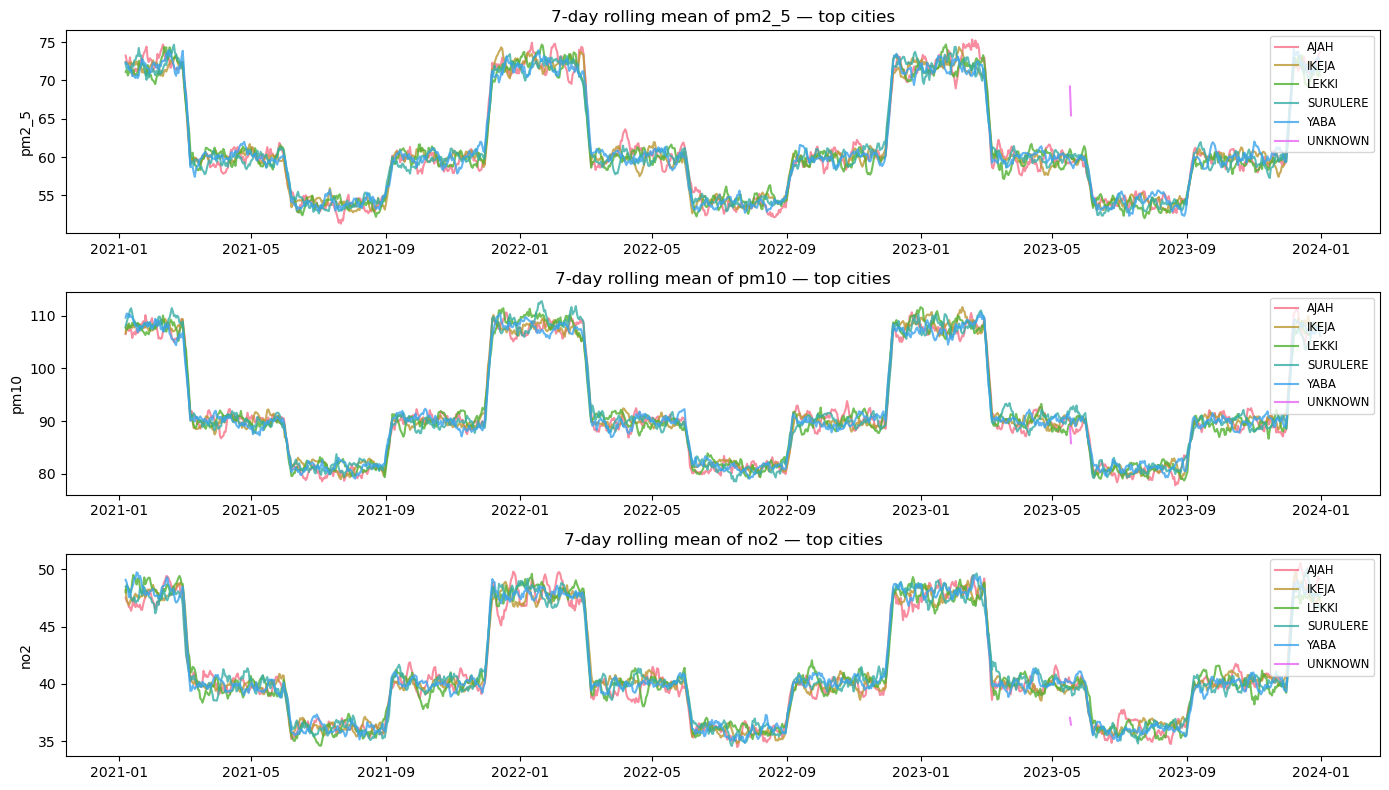

In [42]:
# show multi-city temporal trends and peaks.

top_cities = cityday['city'].value_counts().nlargest(6).index.tolist()  # top 6 by records
plt.figure(figsize=(14,8))
for i, pollutant in enumerate(['pm2_5','pm10','no2']):
    plt.subplot(3,1,i+1)
    for city in top_cities:
        s = cityday[cityday['city']==city].set_index('date')[pollutant].rolling(7).mean()
        plt.plot(s.index, s.values, label=city, alpha=0.8)
    plt.title(f'7-day rolling mean of {pollutant} — top cities')
    plt.ylabel(pollutant)
    plt.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show();

#### 1.2. Monthly average trend (global) — all cities combined

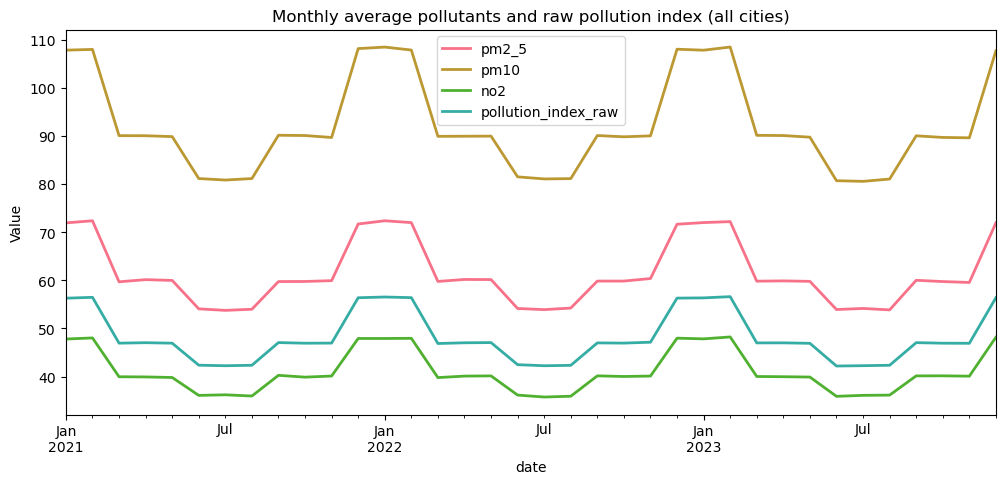

In [43]:
# show long-term trend & seasonal cycles

monthly_global = cityday.set_index('date').resample('M')[['pm2_5','pm10','no2','pollution_index_raw']].mean()
monthly_global.plot(subplots=False, figsize=(12,5), linewidth=2)
plt.title("Monthly average pollutants and raw pollution index (all cities)")
plt.ylabel("Value")
plt.show()


[AJAH] n=1095, using period=365 for decomposition of 'pm2_5'


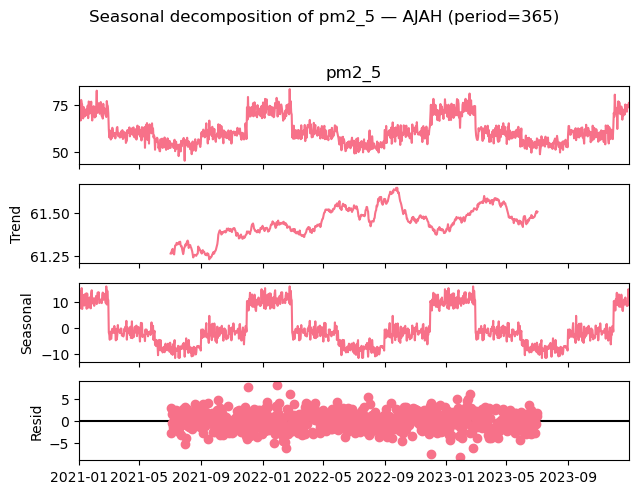

[IKEJA] n=1095, using period=365 for decomposition of 'pm2_5'


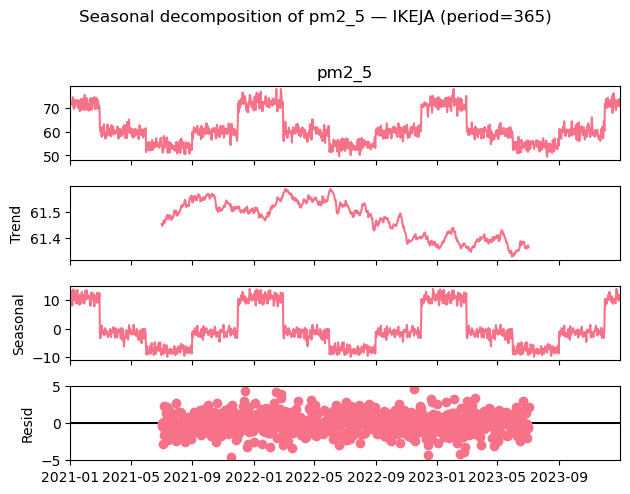

[LEKKI] n=1095, using period=365 for decomposition of 'pm2_5'


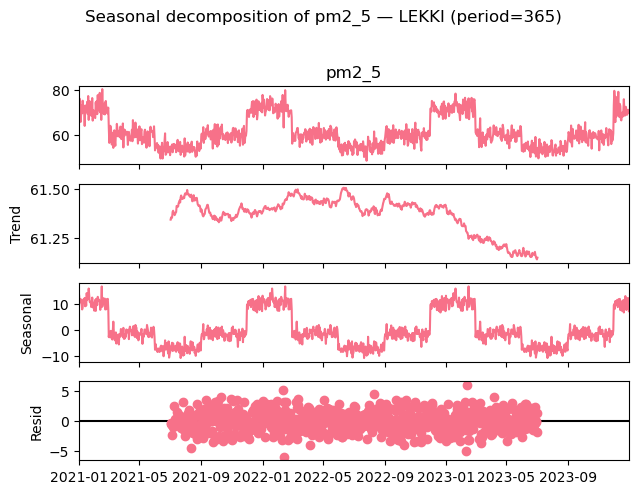

[SURULERE] n=1095, using period=365 for decomposition of 'pm2_5'


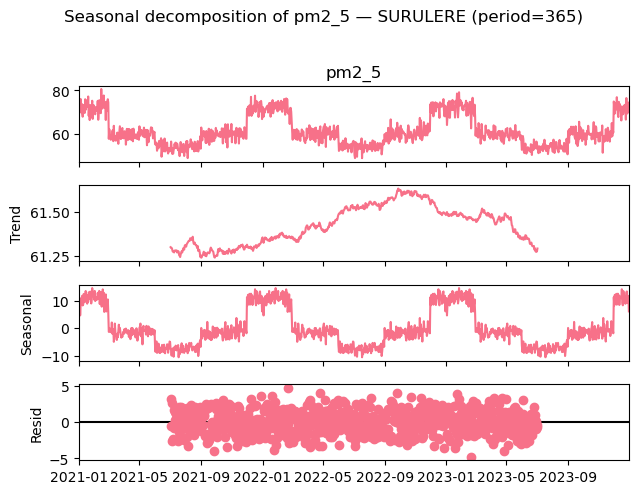

[UNKNOWN] n=868, using period=365 for decomposition of 'pm2_5'


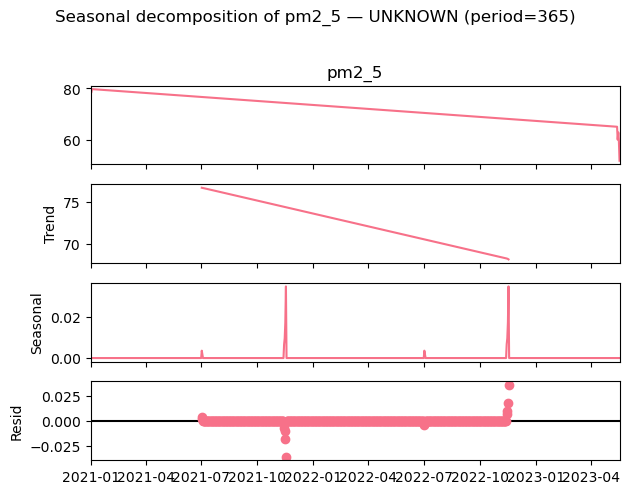

[YABA] n=1095, using period=365 for decomposition of 'pm2_5'


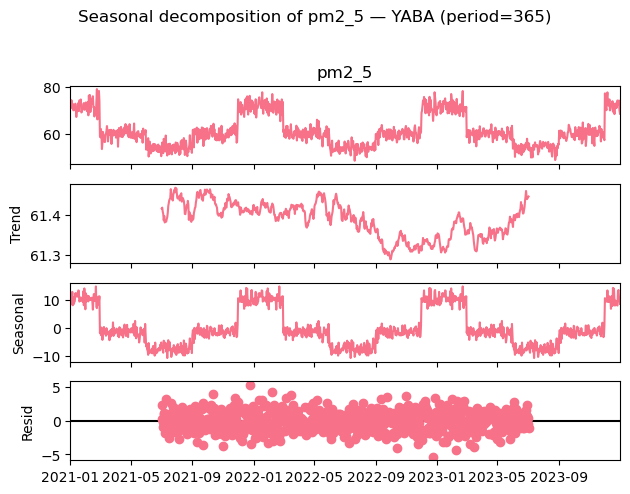

In [44]:
# Seasonal decomposition for every city (PM2.5) — notebook cell
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

def decompose_column_by_city(df, col='pm2_5', min_obs_for_year=365):
    cities = df['city'].unique()
    for city in cities:
        s = (df[df['city'] == city]
             .sort_values('date')
             .set_index('date')[col]
             .asfreq('D'))  # ensure daily index (introduces NaNs for missing days)

        # skip if no data
        if s.dropna().shape[0] < 2:
            print(f"[{city}] not enough data for {col} (n={s.dropna().shape[0]}) — skipping.")
            continue

        # Interpolate missing days sensibly (time-based)
        s = s.interpolate(method='time').fillna(method='bfill').fillna(method='ffill')

        n = s.dropna().shape[0]

        # Choose period: prefer yearly if we have enough history, else monthly (~30d)
        if n >= 2 * min_obs_for_year:
            period = 365
        elif n >= min_obs_for_year:
            period = 365
        else:
            period = 30

        print(f"[{city}] n={n}, using period={period} for decomposition of '{col}'")

        try:
            res = seasonal_decompose(s, model='additive', period=period, two_sided=True)
            fig = res.plot()
            fig.suptitle(f"Seasonal decomposition of {col} — {city} (period={period})", y=1.02)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            # fallback to STL which is more robust
            print(f"seasonal_decompose failed for {city} ({e}). Falling back to STL.")
            stl = STL(s, period=period, robust=True)
            res2 = stl.fit()
            fig, axes = plt.subplots(3,1, figsize=(12,8), sharex=True)
            axes[0].plot(s); axes[0].set_title(f"{city} — Observed ({col})")
            axes[1].plot(res2.trend); axes[1].set_title("Trend")
            axes[2].plot(res2.seasonal + res2.trend - res2.trend.mean()); axes[2].set_title("Seasonal")
            plt.tight_layout()
            plt.show()

# Run for PM2.5 for all cities
decompose_column_by_city(cityday, col='pm2_5')

[AJAH] n=1095, using period=365 for decomposition of 'pollution_index_raw'


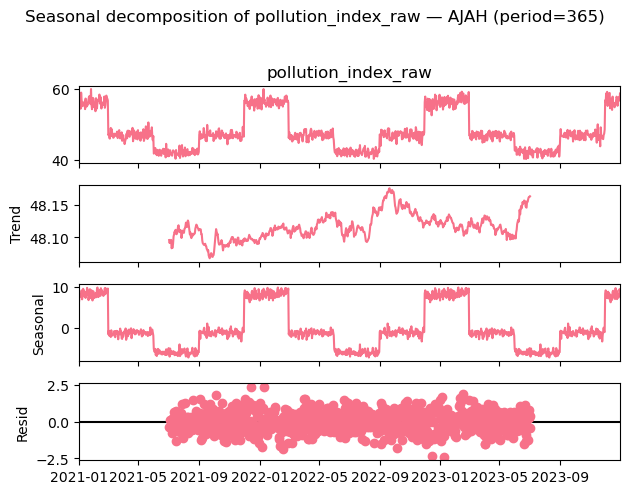

[IKEJA] n=1095, using period=365 for decomposition of 'pollution_index_raw'


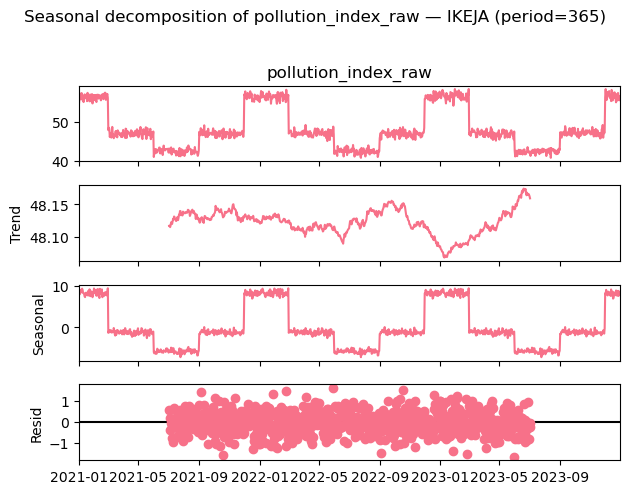

[LEKKI] n=1095, using period=365 for decomposition of 'pollution_index_raw'


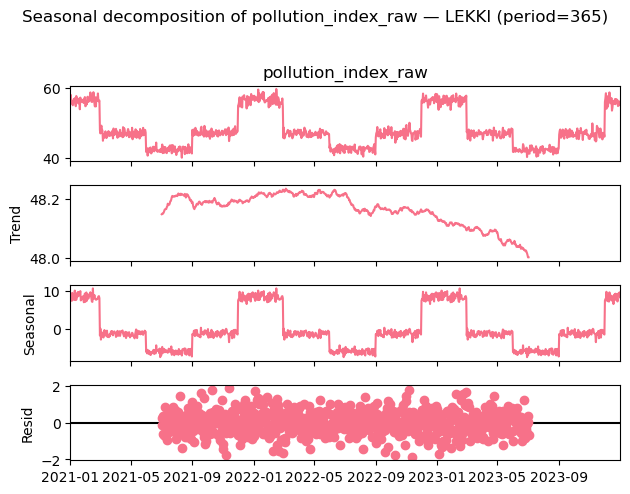

[SURULERE] n=1095, using period=365 for decomposition of 'pollution_index_raw'


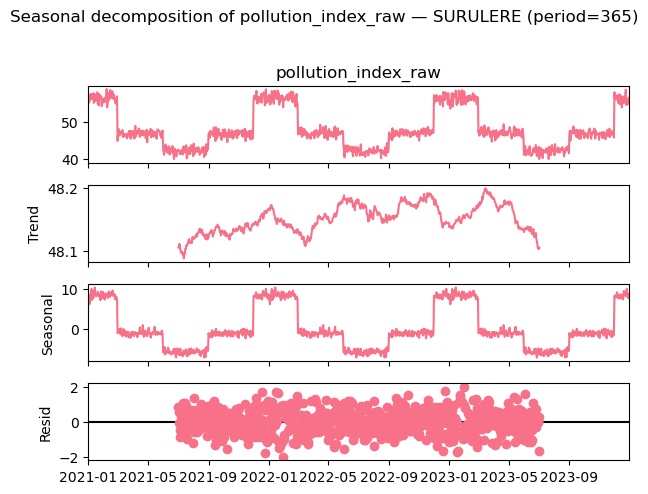

[UNKNOWN] n=868, using period=365 for decomposition of 'pollution_index_raw'


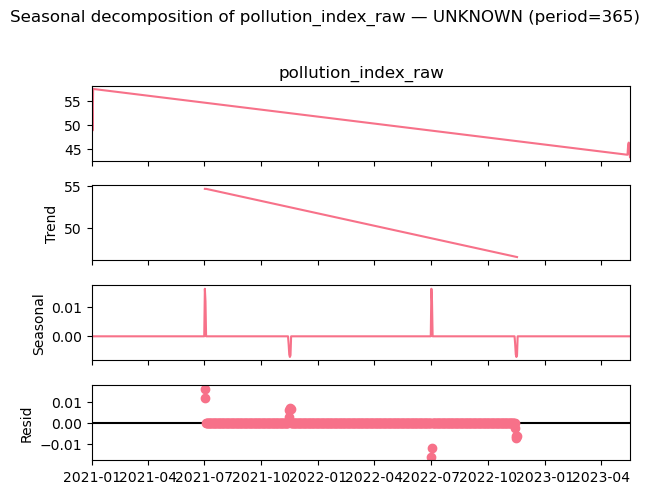

[YABA] n=1095, using period=365 for decomposition of 'pollution_index_raw'


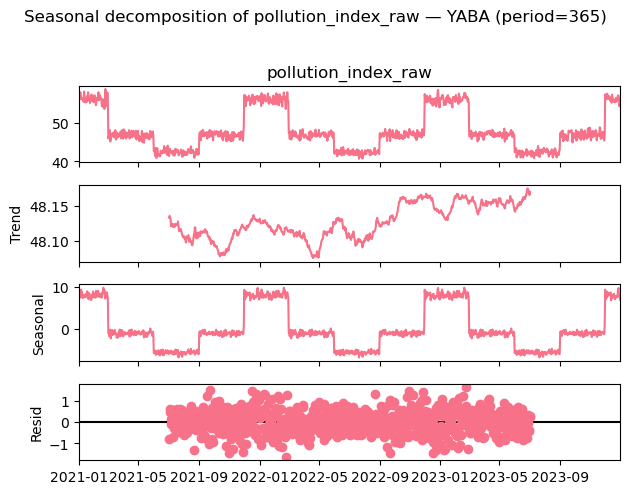

In [45]:
# Optionally run for pollution_index_raw as well
decompose_column_by_city(cityday, col='pollution_index_raw')

#### **2) Seasonal patterns and Harmattan**

#### 2.1. Boxplots of pollutant by season

ValueError: Could not interpret value `season_monthly` for `x`. An entry with this name does not appear in `data`.

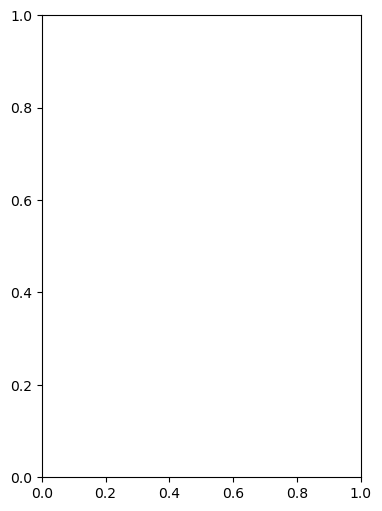

In [46]:
plt.figure(figsize=(14,6))
for i,p in enumerate(['pm2_5','pm10','no2']):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=cityday, x='season_monthly', y=p)
    plt.title(f'{p} by Season')
plt.tight_layout()
plt.show()

In [48]:
df.head()

,city,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,...,pm10_z,no2_z,so2_z,o3_z,pollution_index_std,year,month,day_of_year,quarter,season_monthly
0,AJAH,2021-01-01,39.86,98.09,54.93,29.68,46.00,HOSP_AJA_10,14.0,48.0,...,0.258461,1.248382,2.655520,1.727003,0.920602,2021,1,1,1,Harmattan
1,AJAH,2021-01-01,68.06,80.35,58.54,33.05,48.53,HOSP_AJA_6,16.0,44.9,...,-0.518092,1.571441,3.280215,2.013060,1.348847,2021,1,1,1,Harmattan
2,AJAH,2021-01-01,77.60,76.60,58.08,25.11,17.85,HOSP_AJA_10,9.0,22.7,...,-0.682244,1.530275,1.808383,-1.455805,0.433581,2021,1,1,1,Harmattan
3,AJAH,2021-01-01,90.22,98.94,74.46,19.47,35.27,HOSP_AJA_7,12.0,41.4,...,0.295669,2.996120,0.762899,0.513805,1.257878,2021,1,1,1,Harmattan
4,AJAH,2021-01-01,85.23,95.18,40.59,14.81,52.23,HOSP_AJA_3,17.0,37.0,...,0.131078,-0.034903,-0.100922,2.431404,0.769916,2021,1,1,1,Harmattan


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516794 entries, 0 to 516839
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   city                       516794 non-null  object        
 1   date                       516794 non-null  datetime64[ns]
 2   pm2_5                      516794 non-null  float64       
 3   pm10                       516794 non-null  float64       
 4   no2                        516794 non-null  float64       
 5   so2                        516794 non-null  float64       
 6   o3                         516794 non-null  float64       
 7   hospital_id                516794 non-null  object        
 8   respiratory_cases          516794 non-null  float64       
 9   avg_age_of_patients        516794 non-null  float64       
 10  weather_temperature        516794 non-null  float64       
 11  weather_humidity           516794 non-null  float64      